In [36]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [37]:

circ = QuantumCircuit(7,2)

In [38]:
#The input qubits turned made (1,1,1)
circ.x(0) 
circ.x(1)
circ.x(2) 

In [39]:
#the XOR operations pertaining to qubit 0,1
circ.cx(0,3)
circ.cx(1,3) 


In [40]:
#The AND operations pertaining to qubit 0,1
circ.ccx(0,1,4)

#now unto operations done on the half adder (0,1) + qubit 2

circ.ccx(2,3,5) #And operation on the half adder's sum + the value of qubit 2

#producing full-adder sum
circ.cx(2,3) #XOR operation between the value of the half adder's sum + the value of qubit 2 

In [41]:
#Now let's do an OR operation on the half adder's carry and the half adder + qubit 2 carry
#I'm gonna use a nand to create OR gate through trofolli.

#NOT operation on half adder carry value
circ.x(4)

#NOT operation on half adder + qubit 2 carry value 
circ.x(5)

#AND operation on NOT (half adder carry) AND, NOT (half adder + qubit 2 carry) value to get carry of full adder
circ.ccx(4,5,6)

#and now NOT operation on carry of full adder to get an OR operation
circ.x(6)

In [42]:
#Okay now measuring sum and carry of full-adder
circ.measure(3,0)
circ.measure(6,1)

In [43]:
#Now for fun let's see our circuit drawing!
circ.draw()

┌───┐                                         
q_0: ┤ X ├──■─────────■────────────────────────────
     ├───┤  │         │                            
q_1: ┤ X ├──┼────■────■────────────────────────────
     ├───┤  │    │    │                            
q_2: ┤ X ├──┼────┼────┼────■────■──────────────────
     └───┘┌─┴─┐┌─┴─┐  │    │  ┌─┴─┐     ┌─┐        
q_3: ─────┤ X ├┤ X ├──┼────■──┤ X ├─────┤M├────────
          └───┘└───┘┌─┴─┐  │  ├───┤     └╥┘        
q_4: ───────────────┤ X ├──┼──┤ X ├──■───╫─────────
                    └───┘┌─┴─┐├───┤  │   ║         
q_5: ────────────────────┤ X ├┤ X ├──■───╫─────────
                         └───┘└───┘┌─┴─┐ ║ ┌───┐┌─┐
q_6: ──────────────────────────────┤ X ├─╫─┤ X ├┤M├
                                   └───┘ ║ └───┘└╥┘
c: 2/════════════════════════════════════╩═══════╩═
                                         0       1

In [44]:
#lets check the value of the qubits using an actual quantum computer!
from qiskit import transpile 
from qiskit import IBMQ
IBMQ.save_account('XXXXX')
# Use AerSimulator
from qiskit import Aer


configrc.store_credentials:WARNING:2023-10-19 19:48:26,804: Credentials already present. Set overwrite=True to overwrite.


In [45]:
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers
from qiskit_ibm_runtime import QiskitRuntimeService


In [46]:
# Initialize the account first.
service = QiskitRuntimeService()

service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_lagos')>]

In [47]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

ActualQuantumComputer = provider.get_backend('ibm_lagos') 
transpiled_circuit= transpile(circ, ActualQuantumComputer)
transpiled_circuit.draw()

global phase: 3π/8
            ┌───┐                                                         »
q_2 -> 0 ───┤ X ├─────────────────────────────────────────────────────────»
         ┌──┴───┴──┐┌────┐┌─────────┐               ┌───┐            ┌───┐»
q_6 -> 1 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├───────────────┤ X ├─────■──────┤ X ├»
         ├─────────┤├────┤├─────────┤               └─┬─┘     │      └─┬─┘»
q_5 -> 2 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─────────────────┼───────┼────────┼──»
         ├─────────┤├────┤├─────────┤     ┌───┐       │     ┌─┴─┐      │  »
q_4 -> 3 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■──┤ X ├──■────■─────┤ X ├──────■──»
         └──┬───┬──┘└────┘└─────────┘  │  └─┬─┘  │          └───┘         »
q_0 -> 4 ───┤ X ├─────■────────────────┼────┼────┼─────────────────────■──»
            └───┘   ┌─┴─┐    ┌───┐   ┌─┴─┐  │  ┌─┴─┐┌───┐┌──────────┐┌─┴─┐»
q_3 -> 5 ───────────┤ X ├────┤ X ├───┤ X ├──■──┤ X ├┤ X ├┤ Rz(-π/4) ├┤ X ├»
            ┌───┐   └───┘    └─┬─┘   └───┘     └───┘└─┬─┘└──────────┘└───┘»
q_1 -> 6 ───┤ X ├──────────────■──────────────────────■───────────────────»
            └───┘                                                         »
    c: 2/═════════════════════════════════════════════════════════════════»
                                                                          »
«                                                                              »
«q_2 -> 0 ──────────────────────────────────────────────────────■──────────────»
«                                   ┌───┐            ┌───┐    ┌─┴─┐ ┌─────────┐»
«q_6 -> 1 ─────■────────────────────┤ X ├──────■─────┤ X ├────┤ X ├─┤ Rz(π/4) ├»
«            ┌─┴─┐   ┌──────────┐   └─┬─┘    ┌─┴─┐   └─┬─┘    └───┘ └─────────┘»
«q_5 -> 2 ───┤ X ├───┤ Rz(-π/4) ├─────■──────┤ X ├─────■───────────────────────»
«            └───┘   └──────────┘            └───┘                             »
«q_4 -> 3 ─────────────────────────────────────────────────────────────────────»
«                                                                              »
«q_0 -> 4 ─────────────────────────────────────■───────────────────────────────»
«         ┌─────────┐   ┌───┐    ┌──────────┐┌─┴─┐┌──────────┐┌────┐┌─────────┐»
«q_3 -> 5 ┤ Rz(π/4) ├───┤ X ├────┤ Rz(-π/4) ├┤ X ├┤ Rz(-π/4) ├┤ √X ├┤ Rz(π/2) ├»
«         └─────────┘   └─┬─┘    ├─────────┬┘└───┘└──────────┘└────┘└─────────┘»
«q_1 -> 6 ────────────────■──────┤ Rz(π/4) ├───────────────────────────────────»
«                                └─────────┘                                   »
«    c: 2/═════════════════════════════════════════════════════════════════════»
«                                                                              »
«                                                                             »
«q_2 -> 0 ───────────────────■────────────────────────────────────────────────»
«         ┌───┐┌──────────┐┌─┴─┐┌──────────┐┌────┐┌─────────┐                 »
«q_6 -> 1 ┤ X ├┤ Rz(-π/4) ├┤ X ├┤ Rz(-π/4) ├┤ √X ├┤ Rz(π/2) ├──■──────────────»
«         └─┬─┘├─────────┬┘└───┘└──────────┘└────┘└─────────┘  │              »
«q_5 -> 2 ──■──┤ Rz(π/4) ├─────────────────────────────────────┼──────────────»
«              └─────────┘                                   ┌─┴─┐┌──────────┐»
«q_4 -> 3 ───────────────────────────────────────────────────┤ X ├┤ Rz(-π/4) ├»
«                                                            └───┘└──────────┘»
«q_0 -> 4 ────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_3 -> 5 ────────────────────────────────────────────────────────────────────»
«                                                                             »
«q_1 -> 6 ────────────────────────────────────────────────────────────────────»
«                                                                             »
«    c: 2/════════════════════════════════════════════════════════════════════»
«                               

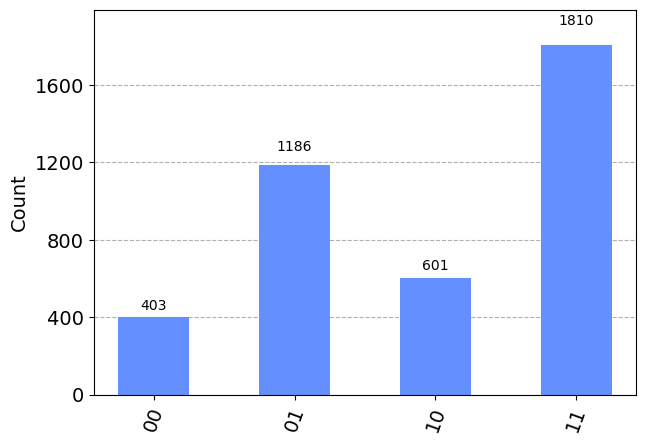

In [48]:
result = ActualQuantumComputer.run(transpiled_circuit).result()
counts = result.get_counts()
plot_histogram(counts)